In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
path = 'C:\\Users\\SHRAVAN\\OneDrive\\iiitb\\PE\\Depression-data\\'

df = pd.read_csv(path + 'scores.csv')


In [3]:
path = 'C:\\Users\\SHRAVAN\\OneDrive\\iiitb\\PE\\Depression-data\\'

p1 = pd.read_csv(path + 'condition\\condition_1.csv')
p1.activity.describe()
p1

timestamp        date  activity
0      2003-05-07 12:00:00  2003-05-07         0
1      2003-05-07 12:01:00  2003-05-07       143
2      2003-05-07 12:02:00  2003-05-07         0
3      2003-05-07 12:03:00  2003-05-07        20
4      2003-05-07 12:04:00  2003-05-07       166
...                    ...         ...       ...
23239  2003-05-23 15:19:00  2003-05-23         0
23240  2003-05-23 15:20:00  2003-05-23         0
23241  2003-05-23 15:21:00  2003-05-23         0
23242  2003-05-23 15:22:00  2003-05-23         0
23243  2003-05-23 15:23:00  2003-05-23       533

[23244 rows x 3 columns]

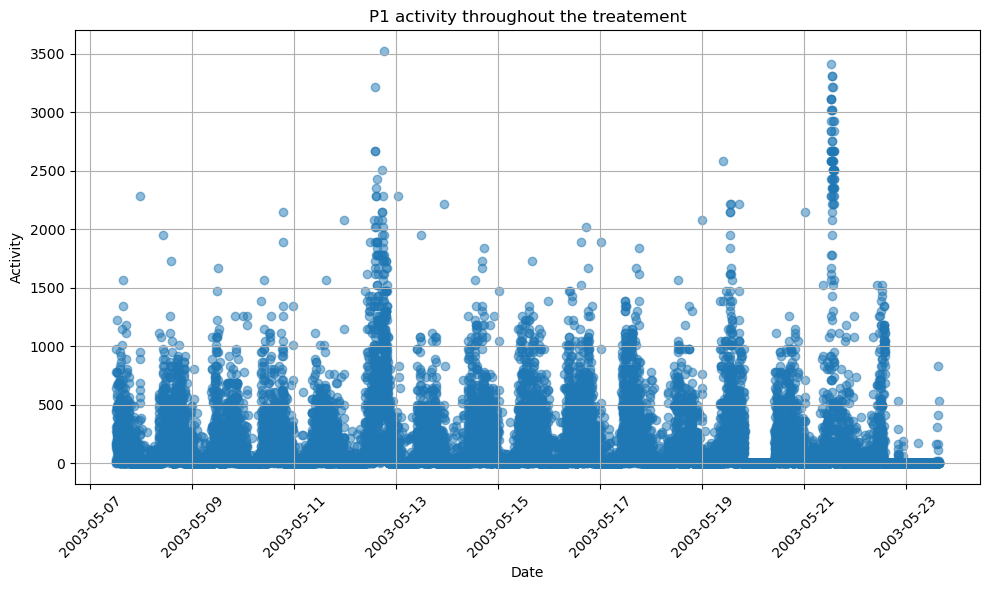

In [4]:
##Plotting activity
p1.timestamp = pd.to_datetime(p1.timestamp)

plt.figure(figsize=(10, 6))
plt.scatter(p1['timestamp'], p1['activity'], alpha=0.5)
plt.title('P1 activity throughout the treatement')
plt.xlabel('Date')
plt.ylabel('Activity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:

p1d = p1[p1.date=='2003-05-09']
p1d = pd.DataFrame(p1d)
p1d

timestamp        date  activity
2160 2003-05-09 00:00:00  2003-05-09       116
2161 2003-05-09 00:01:00  2003-05-09        26
2162 2003-05-09 00:02:00  2003-05-09         0
2163 2003-05-09 00:03:00  2003-05-09        67
2164 2003-05-09 00:04:00  2003-05-09        73
...                  ...         ...       ...
3595 2003-05-09 23:55:00  2003-05-09        82
3596 2003-05-09 23:56:00  2003-05-09        58
3597 2003-05-09 23:57:00  2003-05-09        91
3598 2003-05-09 23:58:00  2003-05-09        94
3599 2003-05-09 23:59:00  2003-05-09        73

[1440 rows x 3 columns]

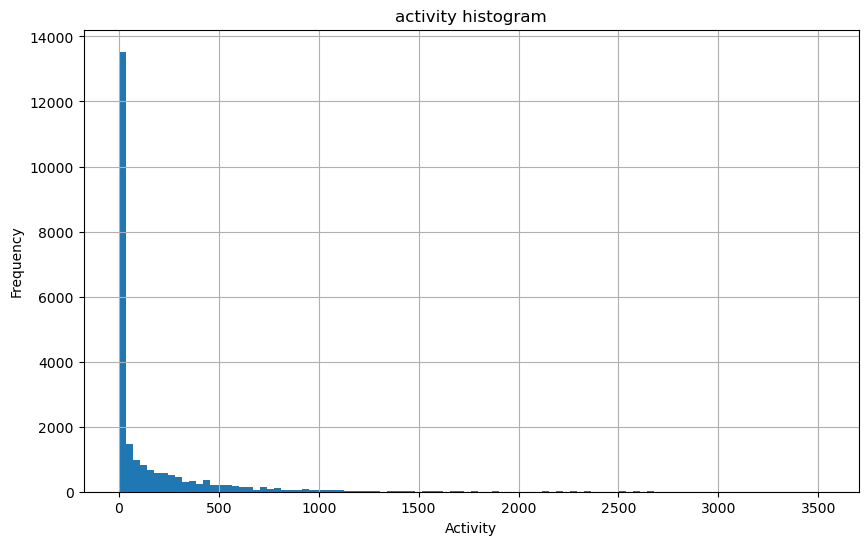

In [6]:
plt.figure(figsize=(10,6))
p1.activity.plot(kind='hist', bins=100)
plt.title('activity histogram')
plt.xlabel('Activity')
plt.grid()
plt.show()

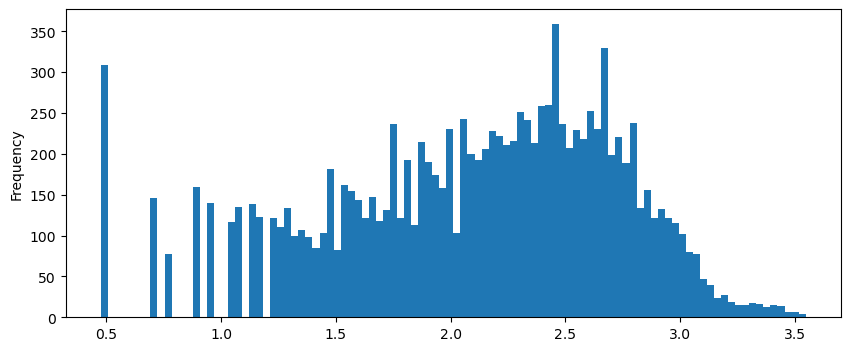

In [7]:
# Avoiding Zero values
plt.figure(figsize=(10,4))
np.log10(p1[p1 !=0].activity).plot(kind= 'hist', bins=100)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


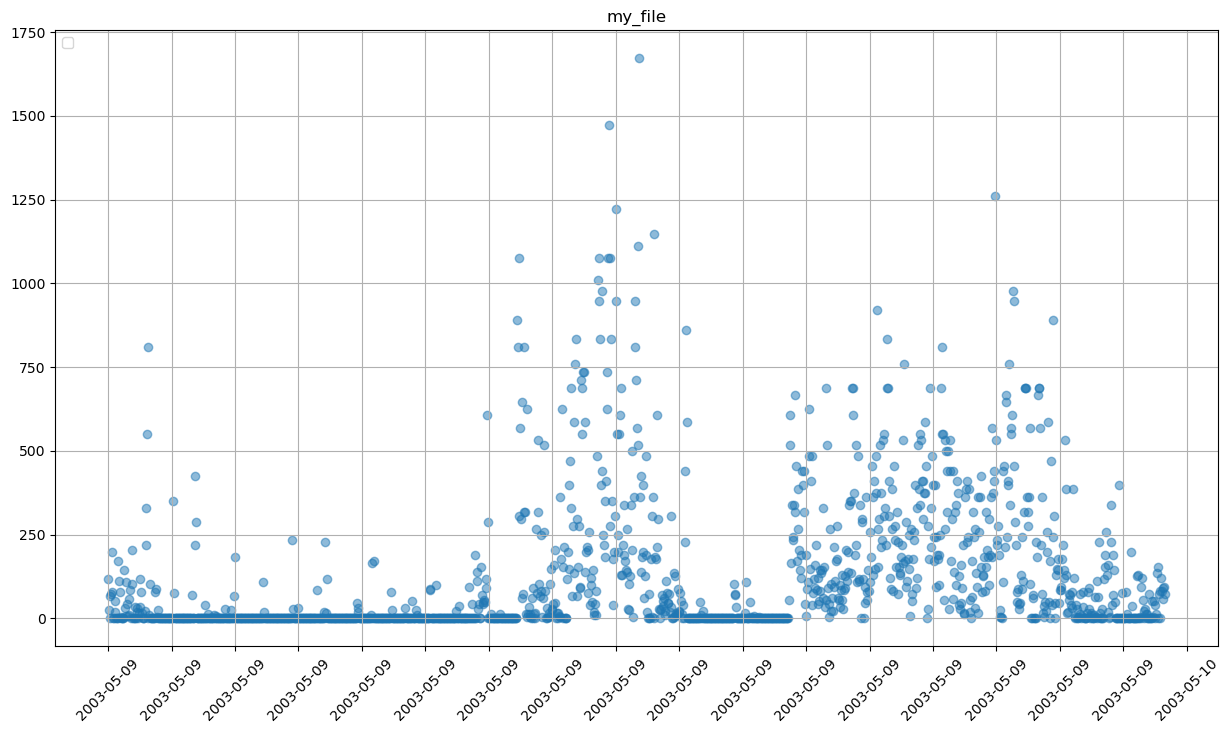

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(p1d.timestamp, p1d.activity, alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title('my_file')
plt.xticks(rotation=45)
plt.grid()
ax.legend(loc='upper left')
plt.show()


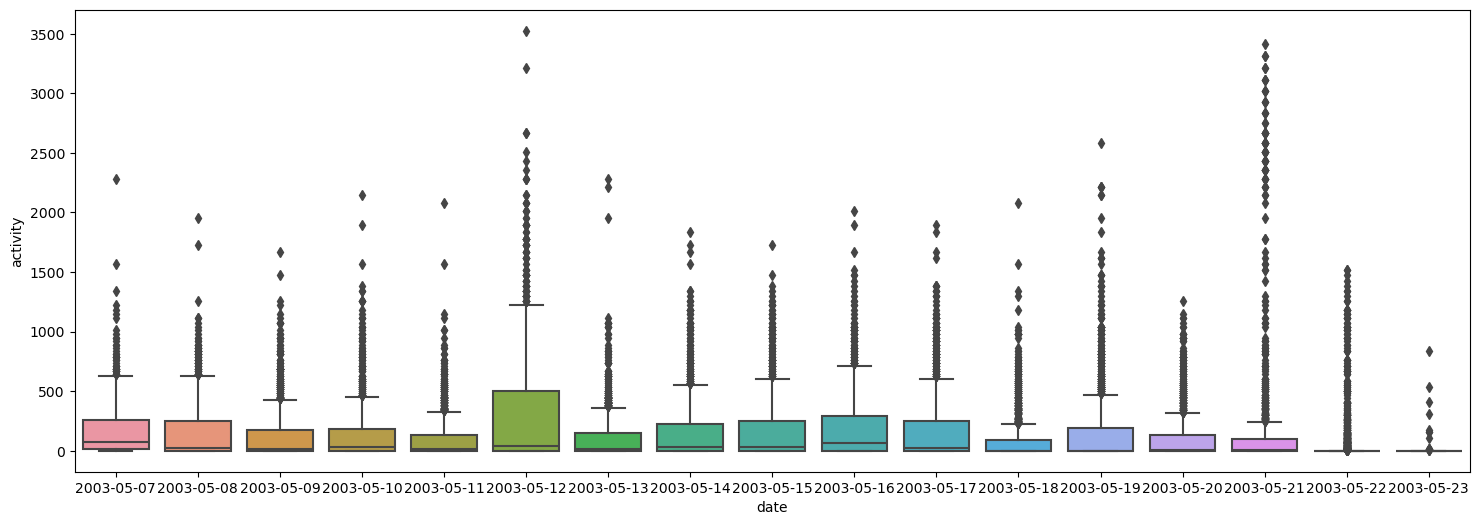

In [9]:
plt.subplots(figsize=(18,6))
sns.boxplot(data=p1, x='date', y='activity')
plt.show()

In [10]:
#aggregating by mean by date

p1_date = p1.groupby(['date'], as_index=False).agg(
    n= pd.NamedAgg(column= 'activity', aggfunc='count'),
    act_mean = pd.NamedAgg(column= 'activity', aggfunc= 'mean'),
    act_std = pd.NamedAgg(column= 'activity', aggfunc= 'std'),
    act_75 = pd.NamedAgg(column= 'activity', aggfunc= lambda x: np.percentile(a=x, q=75)),
    act_95 = pd.NamedAgg(column= 'activity', aggfunc= lambda x: np.percentile(a=x, q=95)),
    act_99 = pd.NamedAgg(column= 'activity', aggfunc= lambda x: np.percentile(a=x, q=99)),
    
)

p1_date

date     n    act_mean     act_std  act_75  act_95   act_99
0   2003-05-07   720  174.144444  240.053885  259.00   667.0  1003.92
1   2003-05-08  1440  156.247222  229.109777  252.25   626.0   890.00
2   2003-05-09  1440  124.135417  211.241278  172.00   587.0   948.00
3   2003-05-10  1440  134.961806  230.954732  184.00   587.0  1097.35
4   2003-05-11  1440   99.439583  177.719972  134.00   469.0   759.00
5   2003-05-12  1440  316.874306  496.184847  500.00  1384.0  2055.04
6   2003-05-13  1440  108.475694  202.428108  148.00   469.0   879.08
7   2003-05-14  1440  155.684722  252.478655  227.00   667.0  1182.00
8   2003-05-15  1440  170.877083  265.613134  250.00   759.0  1146.00
9   2003-05-16  1440  190.508333  277.346648  288.50   759.0  1167.96
10  2003-05-17  1440  177.760417  289.240099  250.00   835.0  1205.79
11  2003-05-18  1440   97.729167  199.837162   91.00   533.0   966.30
12  2003-05-19  1440  168.102778  323.667803  191.75   835.0  1474.00
13  2003-05-20  1440  111.488194  201.116850  130.00   550.0   948.00
14  2003-05-21  1440  199.597222  557.173462   98.00  1260.0  2839.00
15  2003-05-22  1440   71.112500  221.692811    0.00   517.8  1167.96
16  2003-05-23   924    2.991342   37.954839    0.00     0.0    14.77

In [11]:
p1_date = p1_date[p1_date.n==1440]
p1_date

date     n    act_mean     act_std  act_75  act_95   act_99
1   2003-05-08  1440  156.247222  229.109777  252.25   626.0   890.00
2   2003-05-09  1440  124.135417  211.241278  172.00   587.0   948.00
3   2003-05-10  1440  134.961806  230.954732  184.00   587.0  1097.35
4   2003-05-11  1440   99.439583  177.719972  134.00   469.0   759.00
5   2003-05-12  1440  316.874306  496.184847  500.00  1384.0  2055.04
6   2003-05-13  1440  108.475694  202.428108  148.00   469.0   879.08
7   2003-05-14  1440  155.684722  252.478655  227.00   667.0  1182.00
8   2003-05-15  1440  170.877083  265.613134  250.00   759.0  1146.00
9   2003-05-16  1440  190.508333  277.346648  288.50   759.0  1167.96
10  2003-05-17  1440  177.760417  289.240099  250.00   835.0  1205.79
11  2003-05-18  1440   97.729167  199.837162   91.00   533.0   966.30
12  2003-05-19  1440  168.102778  323.667803  191.75   835.0  1474.00
13  2003-05-20  1440  111.488194  201.116850  130.00   550.0   948.00
14  2003-05-21  1440  199.597222  557.173462   98.00  1260.0  2839.00
15  2003-05-22  1440   71.112500  221.692811    0.00   517.8  1167.96

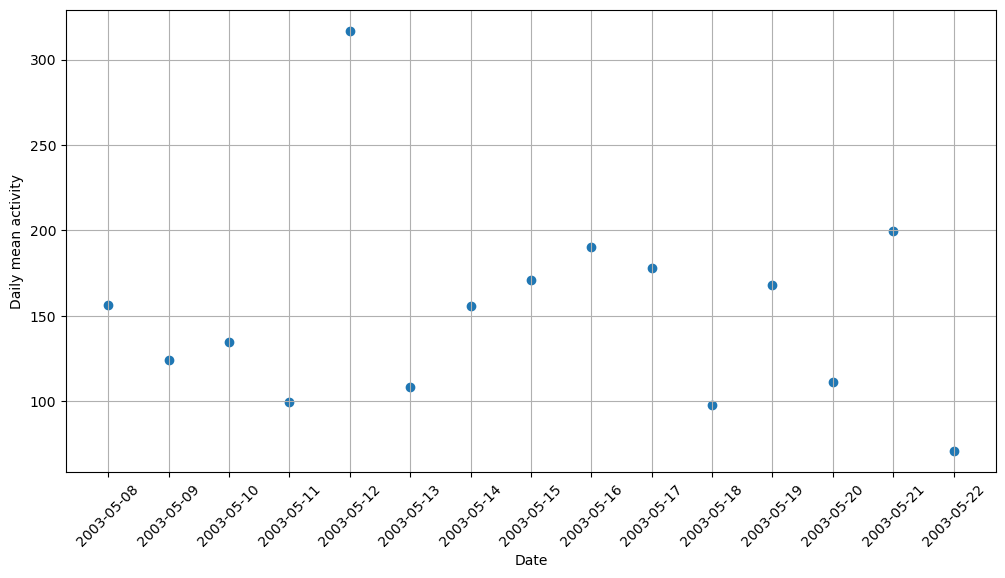

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(p1_date.date, p1_date.act_mean)
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily mean activity')
plt.show()

fig = px.line(p1_date, x='date', y=p1_date.columns[2:5])
fig.show()

In [13]:
!dir C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\condition

 Volume in drive C is OS
 Volume Serial Number is 62AB-F7F8

 Directory of C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\condition

25-04-2024  19:01    <DIR>          .
25-04-2024  20:22    <DIR>          ..
17-03-2024  11:09           786,513 condition_1.csv
17-03-2024  11:09           737,085 condition_10.csv
17-03-2024  11:09           774,388 condition_11.csv
17-03-2024  11:09           749,937 condition_12.csv
17-03-2024  11:09           881,097 condition_13.csv
17-03-2024  11:09           725,533 condition_14.csv
17-03-2024  11:09           736,170 condition_15.csv
17-03-2024  11:09         1,407,179 condition_16.csv
17-03-2024  11:09           727,064 condition_17.csv
17-03-2024  11:09           719,197 condition_18.csv
17-03-2024  11:09           719,674 condition_19.csv
25-04-2024  19:01         1,235,174 condition_2.csv
17-03-2024  11:09           864,060 condition_20.csv
17-03-2024  11:09           685,760 condition_21.csv
17-03-2024  11:09           738,563 condition_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


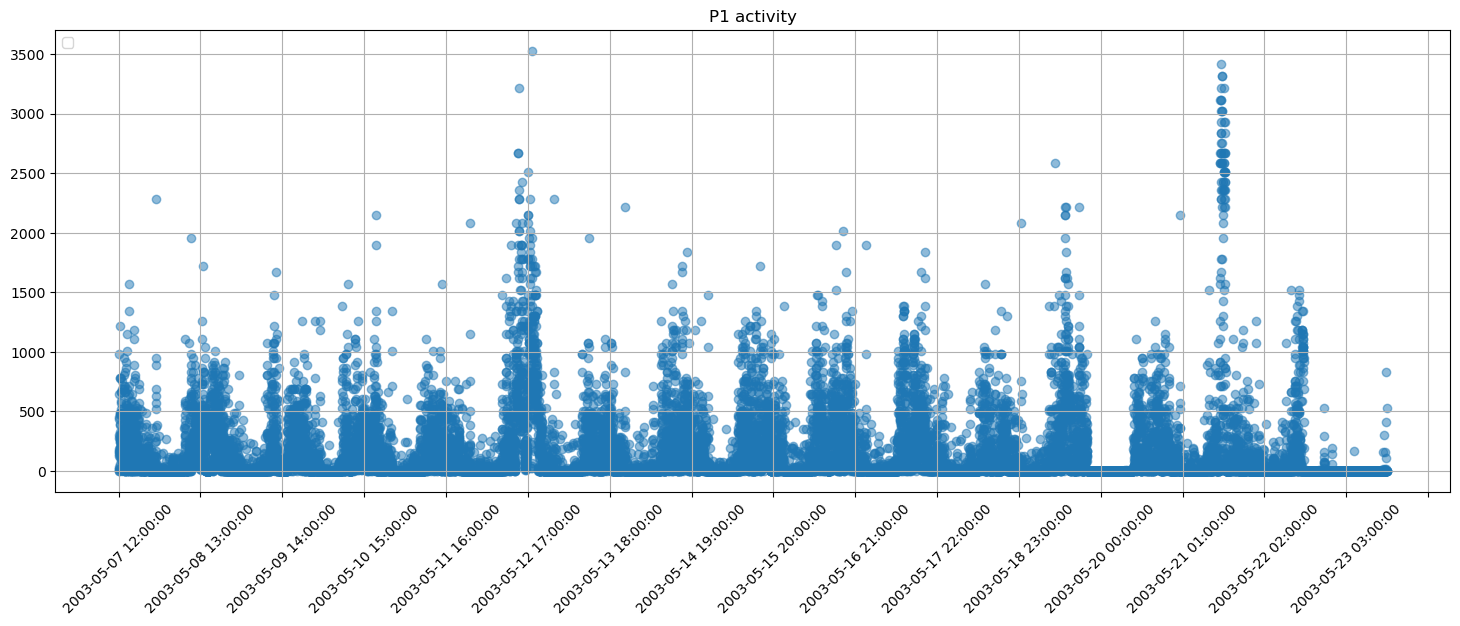

In [14]:
my_file = path + 'condition/condition_1.csv'
df_temp = pd.read_csv(my_file)

my_alpha=0.5
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_temp.timestamp, df_temp.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.title('P1 activity')
plt.xticks(rotation=45)
plt.grid()
ax.legend(loc='upper left')
plt.show()

In [15]:
# for removing the inconsistency(0s)
mini_mark = 10


In [16]:
mean_list = []
std_list = []
q75_list = []
std_q75_list = []
q99_list = []
std_q99_list = []

for i in range(23):
    j = 1+i
    my_file = path + 'condition/condition_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
# group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
         mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
     q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]

    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > mini_mark]

    print(df_temp_by_date)
    print()

# extract statistics
    mean_temp = df_temp_by_date.mean_act.mean()
    std_temp = df_temp_by_date.mean_act.std()
    mean_q75_temp = df_temp_by_date.q75_act.mean()
    std_q75_temp = df_temp_by_date.q75_act.std()
    mean_q99_temp = df_temp_by_date.q99_act.mean()
    std_q99_temp = df_temp_by_date.q99_act.std()
    
# addingto lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q75_list.append(mean_q75_temp)
    std_q75_list.append(std_q75_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)

#proper indentation should be there for loop operation

Extracting from: C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\condition/condition_1.csv
          date     n    mean_act  q75_act  q99_act  max_act
1   2003-05-08  1440  156.247222   252.25   890.00     1954
2   2003-05-09  1440  124.135417   172.00   948.00     1672
3   2003-05-10  1440  134.961806   184.00  1097.35     2146
4   2003-05-11  1440   99.439583   134.00   759.00     2080
5   2003-05-12  1440  316.874306   500.00  2055.04     3526
6   2003-05-13  1440  108.475694   148.00   879.08     2284
7   2003-05-14  1440  155.684722   227.00  1182.00     1836
8   2003-05-15  1440  170.877083   250.00  1146.00     1725
9   2003-05-16  1440  190.508333   288.50  1167.96     2016
10  2003-05-17  1440  177.760417   250.00  1205.79     1894
11  2003-05-18  1440   97.729167    91.00   966.30     2080
12  2003-05-19  1440  168.102778   191.75  1474.00     2586
13  2003-05-20  1440  111.488194   130.00   948.00     1260
14  2003-05-21  1440  199.597222    98.00  2839.00     3418
15  20

In [17]:
all_condition = pd.DataFrame(zip(df.number, mean_list, q75_list, q99_list, std_list, std_q75_list, std_q99_list),
                             columns=['number', 'mean_of_meanact', 'mean_of_Q75act', 'mean_of_Q99act',
                                      'std_of_meanact', 'std_of_Q75act', 'std_of_Q99act'])
all_condition


number  mean_of_meanact  mean_of_Q75act  mean_of_Q99act  \
0    condition_1       152.199630      194.433333     1248.365333   
1    condition_2       211.280738      278.394737     1538.777368   
2    condition_3       280.810714      423.910714     1605.270000   
3    condition_4       286.064732      427.321429     1710.240714   
4    condition_5       172.622371      212.500000     1300.538571   
5    condition_6       194.754861      267.875000     1428.765000   
6    condition_7       295.975588      495.942308     1651.887692   
7    condition_8       200.443750      223.818182     1804.810000   
8    condition_9       177.031624      223.000000     1420.541538   
9   condition_10       296.403373      441.785714     1691.552143   
10  condition_11       130.193472      125.483333     1250.976000   
11  condition_12       152.202579      204.803571     1150.928571   
12  condition_13       250.221389      381.916667     1472.341333   
13  condition_14        73.919345       47.892857      854.062143   
14  condition_15       110.199752      126.625000     1021.992857   
15  condition_16       224.404707      331.250000     1594.229444   
16  condition_17        86.658532       99.357143      839.977143   
17  condition_18        71.438393       86.357143      665.491429   
18  condition_19       160.592808      202.678571     1157.206429   
19  condition_20        65.370585       45.732143      721.270000   
20  condition_21        77.849145       37.288462     1029.979231   
21  condition_22       162.231448      258.017857     1031.067857   
22  condition_23       246.393505      378.352941     1555.232353   

    std_of_meanact  std_of_Q75act  std_of_Q99act  
0        59.218240     113.760261     537.750628  
1        80.924414     117.507958     528.810407  
2        61.577770     143.258897     287.349708  
3       166.280241     296.430194     609.340002  
4        46.444164      87.868564     259.816491  
5        38.794611     102.257723     153.984219  
6       148.639974     317.549671     401.224692  
7        95.169158     127.863066     745.719621  
8        25.805786      46.085066     151.907215  
9        84.898469     175.240134     256.541836  
10       64.907332     123.432329     317.950239  
11       63.119931     117.073784     315.606819  
12       66.762782     144.097954     202.977926  
13       24.937508      31.692136     322.492206  
14       60.377039     109.217441     367.810858  
15       75.568803     157.829860     377.177396  
16       11.406454      33.931168     481.204262  
17        9.301415      20.827523      96.547265  
18       72.269296     148.974650     196.071750  
19       17.739953      28.651330     117.814960  
20       21.376152      30.747941     185.432604  
21       30.468369      77.008707     170.773109  
22       59.113570     122.103826     239.210604

In [18]:
!dir C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\control

 Volume in drive C is OS
 Volume Serial Number is 62AB-F7F8

 Directory of C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\control

25-04-2024  19:20    <DIR>          .
25-04-2024  20:22    <DIR>          ..
25-04-2024  19:01         1,622,733 control_1.csv
17-03-2024  11:09           737,711 control_10.csv
17-03-2024  11:09           838,119 control_11.csv
17-03-2024  11:09         1,162,293 control_12.csv
17-03-2024  11:09           755,553 control_13.csv
17-03-2024  11:09           760,480 control_14.csv
17-03-2024  11:09           759,535 control_15.csv
17-03-2024  11:09           835,476 control_16.csv
17-03-2024  11:09           978,404 control_17.csv
17-03-2024  11:09           838,380 control_18.csv
17-03-2024  11:09           933,885 control_19.csv
17-03-2024  11:09         1,079,823 control_2.csv
17-03-2024  11:09         1,078,294 control_20.csv
17-03-2024  11:09         1,078,749 control_21.csv
17-03-2024  11:09           740,735 control_22.csv
17-03-2024  11:09        

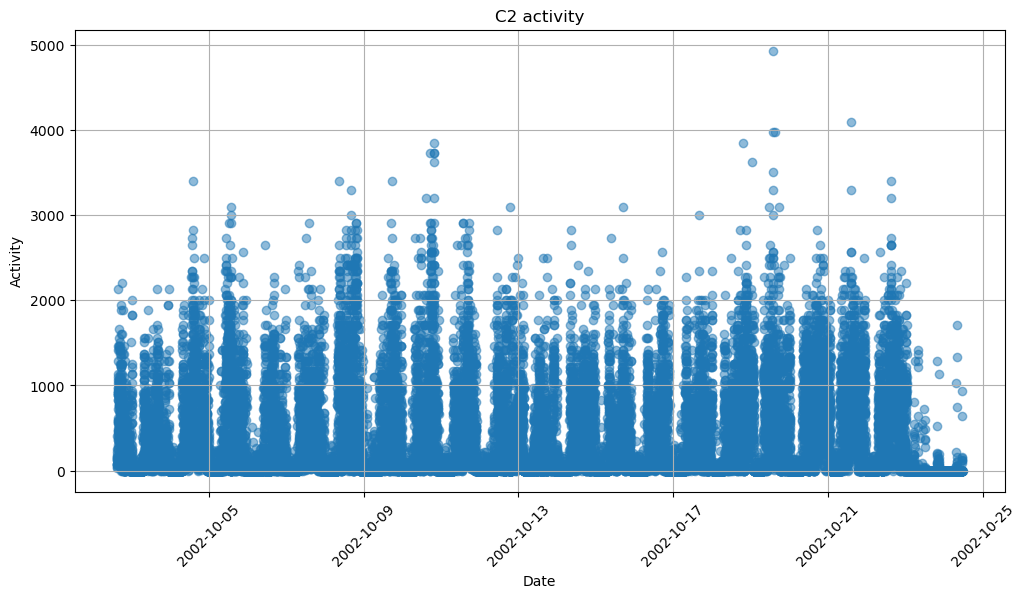

In [19]:
c20 = pd.read_csv(path+ 'control/control_2.csv')
c20.timestamp = pd.to_datetime(c20.timestamp)

plt.figure(figsize=(12,6))
plt.scatter(c20.timestamp, c20.activity, alpha=0.5)
plt.title('C2 activity')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Activity')
plt.xticks(rotation=45)
plt.show()


In [20]:
mean_list = []
std_list = []
q75_list = []
std_q75_list = []
q99_list = []
std_q99_list = []

for i in range(32):
    j = 1+i
    my_file = path + 'control/control_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
# group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
         mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
     q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]

    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > mini_mark]

    print(df_temp_by_date)
    print()

# extract statistics
    mean_temp = df_temp_by_date.mean_act.mean()
    std_temp = df_temp_by_date.mean_act.std()
    mean_q75_temp = df_temp_by_date.q75_act.mean()
    std_q75_temp = df_temp_by_date.q75_act.std()
    mean_q99_temp = df_temp_by_date.q99_act.mean()
    std_q99_temp = df_temp_by_date.q99_act.std()
    
# addingto lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q75_list.append(mean_q75_temp)
    std_q75_list.append(std_q75_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)


Extracting from: C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\control/control_1.csv
          date     n    mean_act  q75_act  q99_act  max_act
0   01-04-2003  1440  109.022917     70.0  1418.00     2911
1   02-04-2003  1440  128.501389      0.0  3156.78     5575
2   03-04-2003  1440   69.356250      3.0  2003.00     3506
3   04-04-2003  1440   55.559028      3.0  2492.00     3097
19  19-03-2003  1440  185.568056    201.0  1607.00     3097
21  20-03-2003  1440  225.981250    248.0  1712.00     2651
23  21-03-2003  1440  169.663194    194.0  1375.00     2066
25  22-03-2003  1440  183.690972    184.0  1290.00     2415
27  23-03-2003  1440  347.075000    347.0  1332.00     1824
29  24-03-2003  1440  194.423611    194.0  1638.72     2341
30  25-03-2003  1440  310.715278    495.0  1882.00     2651
31  26-03-2003  1440  199.518750    273.0  1520.95     3195
32  27-03-2003  1440  183.131944    201.0  1358.23     2199
33  28-03-2003  1440  218.872222    223.0  1745.55     2415
34  29-03-

In [21]:
df_control = df[df.number.str.contains('control')]
df_control

number  days  gender    age  afftype  melanch  inpatient  edu  \
23   control_1     8       2  25-29      NaN      NaN        NaN  NaN   
24   control_2    20       1  30-34      NaN      NaN        NaN        
25   control_3    12       2  30-34      NaN      NaN        NaN        
26   control_4    13       1  25-29      NaN      NaN        NaN        
27   control_5    13       1  30-34      NaN      NaN        NaN        
28   control_6    13       1  25-29      NaN      NaN        NaN        
29   control_7    13       1  20-24      NaN      NaN        NaN        
30   control_8    13       2  40-44      NaN      NaN        NaN        
31   control_9    13       2  30-34      NaN      NaN        NaN        
32  control_10     8       1  30-34      NaN      NaN        NaN        
33  control_11    13       1  45-49      NaN      NaN        NaN        
34  control_12    14       1  60-64      NaN      NaN        NaN        
35  control_13    13       1  50-54      NaN      NaN        NaN  NaN   
36  control_14    13       1  50-54      NaN      NaN        NaN        
37  control_15    11       1  45-49      NaN      NaN        NaN        
38  control_16    13       2  40-44      NaN      NaN        NaN        
39  control_17     9       1  45-49      NaN      NaN        NaN        
40  control_18    13       2  20-24      NaN      NaN        NaN        
41  control_19    13       1  50-54      NaN      NaN        NaN        
42  control_20    13       1  35-39      NaN      NaN        NaN        
43  control_21     8       1  50-54      NaN      NaN        NaN        
44  control_22    13       1  25-29      NaN      NaN        NaN        
45  control_23    13       1  20-24      NaN      NaN        NaN        
46  control_24    13       2  20-24      NaN      NaN        NaN        
47  control_25    13       1  65-69      NaN      NaN        NaN        
48  control_26    13       1  35-39      NaN      NaN        NaN        
49  control_27    13       2  50-54      NaN      NaN        NaN        
50  control_28    16       2  45-49      NaN      NaN        NaN        
51  control_29    13       2  50-54      NaN      NaN        NaN        
52  control_30     9       2  35-39      NaN      NaN        NaN        
53  control_31    13       1  20-24      NaN      NaN        NaN        
54  control_32    14       2  25-29      NaN      NaN        NaN        

    marriage  work  madrs1  madrs2  
23       NaN   NaN     NaN     NaN  
24       NaN   NaN     NaN     NaN  
25       NaN   NaN     NaN     NaN  
26       NaN   NaN     NaN     NaN  
27       NaN   NaN     NaN     NaN  
28       NaN   NaN     NaN     NaN  
29       NaN   NaN     NaN     NaN  
30       NaN   NaN     NaN     NaN  
31       NaN   NaN     NaN     NaN  
32       NaN   NaN     NaN     NaN  
33       NaN   NaN     NaN     NaN  
34       NaN   NaN     NaN     NaN  
35       NaN   NaN     NaN     NaN  
36       NaN   NaN     NaN     NaN  
37       NaN   NaN     NaN     NaN  
38       NaN   NaN     NaN     NaN  
39       NaN   NaN     NaN     NaN  
40       NaN   NaN     NaN     NaN  
41       NaN   NaN     NaN     NaN  
42       NaN   NaN     NaN     NaN  
43       NaN   NaN     NaN     NaN  
44       NaN   NaN     NaN     NaN  
45       NaN   NaN     NaN     NaN  
46       NaN   NaN     NaN     NaN  
47       NaN   NaN     NaN     NaN  
48       NaN   NaN     NaN     NaN  
49       NaN   NaN     NaN     NaN  
50       NaN   NaN     NaN     NaN  
51       NaN   NaN     NaN     NaN  
52       NaN   NaN     NaN     NaN  
53       NaN   NaN     NaN     NaN  
54       NaN   NaN     NaN     NaN

In [22]:
all_control = pd.DataFrame(zip(df_control.number, mean_list, q75_list, q99_list, std_list, std_q75_list, std_q99_list),
                             columns=['number', 'mean_of_meanact', 'mean_of_Q75act', 'mean_of_Q99act',
                                      'std_of_meanact', 'std_of_Q75act', 'std_of_Q99act'])
all_control

number  mean_of_meanact  mean_of_Q75act  mean_of_Q99act  \
0    control_1       193.090712      206.562500     1747.426875   
1    control_2       407.458697      652.559524     2044.739048   
2    control_3       249.641270      366.660714     1502.540000   
3    control_4       186.394213      196.000000     1711.935333   
4    control_5       246.008987      384.617647     1403.467059   
5    control_6       279.535294      334.794118     2064.458235   
6    control_7       360.261161      500.517857     2557.209286   
7    control_8       380.200787      593.850000     1970.728667   
8    control_9       141.170370      167.400000     1145.389333   
9   control_10       290.439782      462.982143     1865.657143   
10  control_11       189.521726      248.053571     1413.931429   
11  control_12       139.782917      202.016667      915.619333   
12  control_13       175.276835      234.464286     1232.532857   
13  control_14       362.287450      514.428571     2426.409286   
14  control_15       291.706300      416.214286     1873.499286   
15  control_16       225.280602      323.266667     1300.922000   
16  control_17       242.138194      346.910714     1395.502857   
17  control_18       282.217659      410.321429     1642.464286   
18  control_19       202.425000      289.983333     1345.251333   
19  control_20       322.976574      516.400000     1850.555333   
20  control_21       259.116419      374.500000     1508.420000   
21  control_22       251.869395      334.678571     1615.357143   
22  control_23       197.056746      278.517857     1215.760714   
23  control_24       357.708978      451.071429     2635.942143   
24  control_25       305.307490      475.142857     1768.072857   
25  control_26       315.507726      495.062500     1826.981875   
26  control_27       315.666720      469.211538     1808.869231   
27  control_28       291.968750      422.328125     1808.226875   
28  control_29       266.399802      370.589286     1747.566429   
29  control_30       218.864782      296.089286     1494.918571   
30  control_31       333.077480      473.285714     2210.741429   
31  control_32       156.984375      174.821429     1248.455000   

    std_of_meanact  std_of_Q75act  std_of_Q99act  
0        79.180375     141.915453     488.183345  
1       137.730227     261.527268     352.116906  
2        52.558532     103.920810     193.967304  
3        59.268265      99.049771     298.854188  
4       132.278665     233.728828     525.196868  
5       124.969577     234.759921     572.223333  
6       127.277609     213.356655    1520.288118  
7       125.202102     189.282334     613.697773  
8        47.241626     101.648414     269.018427  
9        83.298433     172.517487     324.491722  
10       57.936198     104.736491     305.621435  
11       48.599370      99.246018     190.024036  
12       65.257581     125.954466     264.449572  
13      109.543682     212.940120     390.008329  
14       51.202618     112.977996     227.396796  
15       78.711319     140.958184     345.452784  
16       61.259673     130.801141     186.730084  
17       88.677220     155.796910     308.698124  
18       73.011898     114.686392     374.105650  
19      122.231605     220.077843     777.743905  
20       54.876174     112.797811     215.362106  
21       61.470476     116.005861     277.488075  
22       50.742277      93.721276     206.531569  
23      119.861709     159.998781    1205.541016  
24       70.544510     165.475007     159.587132  
25      126.421423     212.792691     565.803394  
26       45.706994      90.617663     151.597360  
27       43.967642      83.409768     184.387824  
28       64.431611     127.720985     218.619413  
29       69.881553     109.490235     450.241729  
30      119.620569     213.419929     852.528166  
31       48.369562      82.669024     134.236127

In [23]:
d1 = all_condition.describe()
d1_meanact = d1['mean_of_meanact']
d1

mean_of_meanact  mean_of_Q75act  mean_of_Q99act  std_of_meanact  \
count        23.000000       23.000000       23.000000       23.000000   
mean        177.359263      239.771178     1293.282746       60.221801   
std          75.725958      137.580750      335.760931       39.333135   
min          65.370585       37.288462      665.491429        9.301415   
25%         120.196612      126.054167     1030.523544       28.137077   
50%         172.622371      223.000000     1300.538571       60.377039   
75%         235.399106      354.801471     1574.730899       73.919049   
max         296.403373      495.942308     1804.810000      166.280241   

       std_of_Q75act  std_of_Q99act  
count      23.000000      23.000000  
mean      116.235225     318.413688  
std        75.837742     168.601320  
min        20.827523      96.547265  
25%        61.546887     190.752177  
50%       117.073784     287.349708  
75%       143.678425     389.201044  
max       317.549671     745.719621

In [24]:
d2 = all_control.describe()
d2_meanact = d2['mean_of_meanact']
d2

mean_of_meanact  mean_of_Q75act  mean_of_Q99act  std_of_meanact  \
count        32.000000       32.000000       32.000000       32.000000   
mean        263.666975      374.478207     1696.860976       81.291596   
std          71.689552      124.541947      405.953265       31.768637   
min         139.782917      167.400000      915.619333       43.967642   
25%         201.082937      287.116964     1401.476008       54.296764   
50%         262.758110      372.544643     1729.681104       70.213031   
75%         315.547474      470.230082     1867.617679      119.680854   
max         407.458697      652.559524     2635.942143      137.730227   

       std_of_Q75act  std_of_Q99act  
count      32.000000      32.000000  
mean      148.062548     410.943519  
std        52.523207     309.473258  
min        82.669024     134.236127  
25%       104.532570     213.154471  
50%       129.261063     307.159779  
75%       195.159923     497.436726  
max       261.527268    1520.288118

In [25]:
It is evident that mean scores of control group is much higher than that of condition 

SyntaxError: invalid syntax (3621406037.py, line 1)

In [27]:
all_condition.head()

number  mean_of_meanact  mean_of_Q75act  mean_of_Q99act  \
0  condition_1       152.199630      194.433333     1248.365333   
1  condition_2       211.280738      278.394737     1538.777368   
2  condition_3       280.810714      423.910714     1605.270000   
3  condition_4       286.064732      427.321429     1710.240714   
4  condition_5       172.622371      212.500000     1300.538571   

   std_of_meanact  std_of_Q75act  std_of_Q99act  
0       59.218240     113.760261     537.750628  
1       80.924414     117.507958     528.810407  
2       61.577770     143.258897     287.349708  
3      166.280241     296.430194     609.340002  
4       46.444164      87.868564     259.816491

In [28]:
c_mean = all_condition['mean_of_meanact']
c_mean = c_mean.rename('Condition')
c_std = all_condition['std_of_meanact']
c_std = c_std.rename('Condition')

C_mean = all_control['mean_of_meanact']
C_mean = C_mean.rename('Control')
C_std = all_control['std_of_meanact']
C_std = C_std.rename('Control')

cCmean = pd.concat([c_mean, C_mean], axis=1)
cCmean

cCstd = pd.concat([c_std, C_std], axis=1)
cCstd
cCmean

Condition     Control
0   152.199630  193.090712
1   211.280738  407.458697
2   280.810714  249.641270
3   286.064732  186.394213
4   172.622371  246.008987
5   194.754861  279.535294
6   295.975588  360.261161
7   200.443750  380.200787
8   177.031624  141.170370
9   296.403373  290.439782
10  130.193472  189.521726
11  152.202579  139.782917
12  250.221389  175.276835
13   73.919345  362.287450
14  110.199752  291.706300
15  224.404707  225.280602
16   86.658532  242.138194
17   71.438393  282.217659
18  160.592808  202.425000
19   65.370585  322.976574
20   77.849145  259.116419
21  162.231448  251.869395
22  246.393505  197.056746
23         NaN  357.708978
24         NaN  305.307490
25         NaN  315.507726
26         NaN  315.666720
27         NaN  291.968750
28         NaN  266.399802
29         NaN  218.864782
30         NaN  333.077480
31         NaN  156.984375

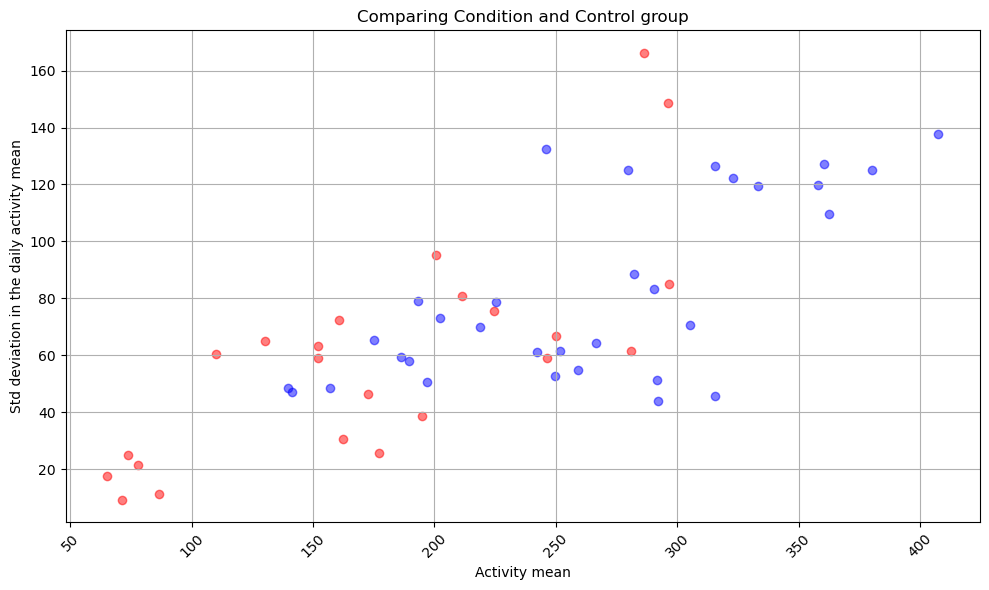

In [29]:

plt.figure(figsize=(10, 6))
plt.scatter(cCmean['Condition'], cCstd['Condition'], alpha=0.5, color = 'red')
plt.scatter(cCmean['Control'], cCstd['Control'], alpha=0.5, color = 'blue')
plt.title('Comparing Condition and Control group')
plt.xlabel('Activity mean')
plt.ylabel('Std deviation in the daily activity mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
condition_mean = all_condition[['number', 'mean_of_meanact']]

control_mean = all_control[['number', 'mean_of_meanact']]
control_mean
condition_mean

number  mean_of_meanact
0    condition_1       152.199630
1    condition_2       211.280738
2    condition_3       280.810714
3    condition_4       286.064732
4    condition_5       172.622371
5    condition_6       194.754861
6    condition_7       295.975588
7    condition_8       200.443750
8    condition_9       177.031624
9   condition_10       296.403373
10  condition_11       130.193472
11  condition_12       152.202579
12  condition_13       250.221389
13  condition_14        73.919345
14  condition_15       110.199752
15  condition_16       224.404707
16  condition_17        86.658532
17  condition_18        71.438393
18  condition_19       160.592808
19  condition_20        65.370585
20  condition_21        77.849145
21  condition_22       162.231448
22  condition_23       246.393505

In [31]:
mean_comb = pd.concat([condition_mean, control_mean], axis=1)
mean_comb = pd.DataFrame(mean_comb)

melt1 = pd.melt(mean_comb, id_vars=["number"], value_name="mean_of _meanact")
melt1

In [32]:
d3 =  pd.read_csv(r"C:\Users\SHRAVAN\OneDrive\iiitb\PE\Depression-data\3Dtable.csv")
d2 = d3.groupby('number')
d1_control = d2.get_group('control')
d1_control
d1_condition = d2.get_group('condition')
d1_condition


number  mean_of_meanact  mean_of_Q75act  std_of_meanact
0   condition       152.199630      194.433333       59.218240
1   condition       211.280738      278.394737       80.924414
2   condition       280.810714      423.910714       61.577770
3   condition       286.064732      427.321429      166.280241
4   condition       172.622371      212.500000       46.444164
5   condition       194.754861      267.875000       38.794611
6   condition       295.975588      495.942308      148.639974
7   condition       200.443750      223.818182       95.169158
8   condition       177.031624      223.000000       25.805786
9   condition       296.403373      441.785714       84.898469
10  condition       130.193472      125.483333       64.907332
11  condition       152.202579      204.803571       63.119931
12  condition       250.221389      381.916667       66.762782
13  condition        73.919345       47.892857       24.937508
14  condition       110.199752      126.625000       60.377039
15  condition       224.404707      331.250000       75.568803
16  condition        86.658532       99.357143       11.406454
17  condition        71.438393       86.357143        9.301415
18  condition       160.592808      202.678571       72.269296
19  condition        65.370585       45.732143       17.739953
20  condition        77.849145       37.288462       21.376152
21  condition       162.231448      258.017857       30.468369
22  condition       246.393505      378.352941       59.113570

In [33]:
fig = px.scatter_3d(d3, x='mean_of_meanact', y='mean_of_Q75act', z='std_of_meanact',
                   color= 'number',
                   hover_data=['number'],
                   opacity=0.5)
fig.show(width=1000, height=1000)

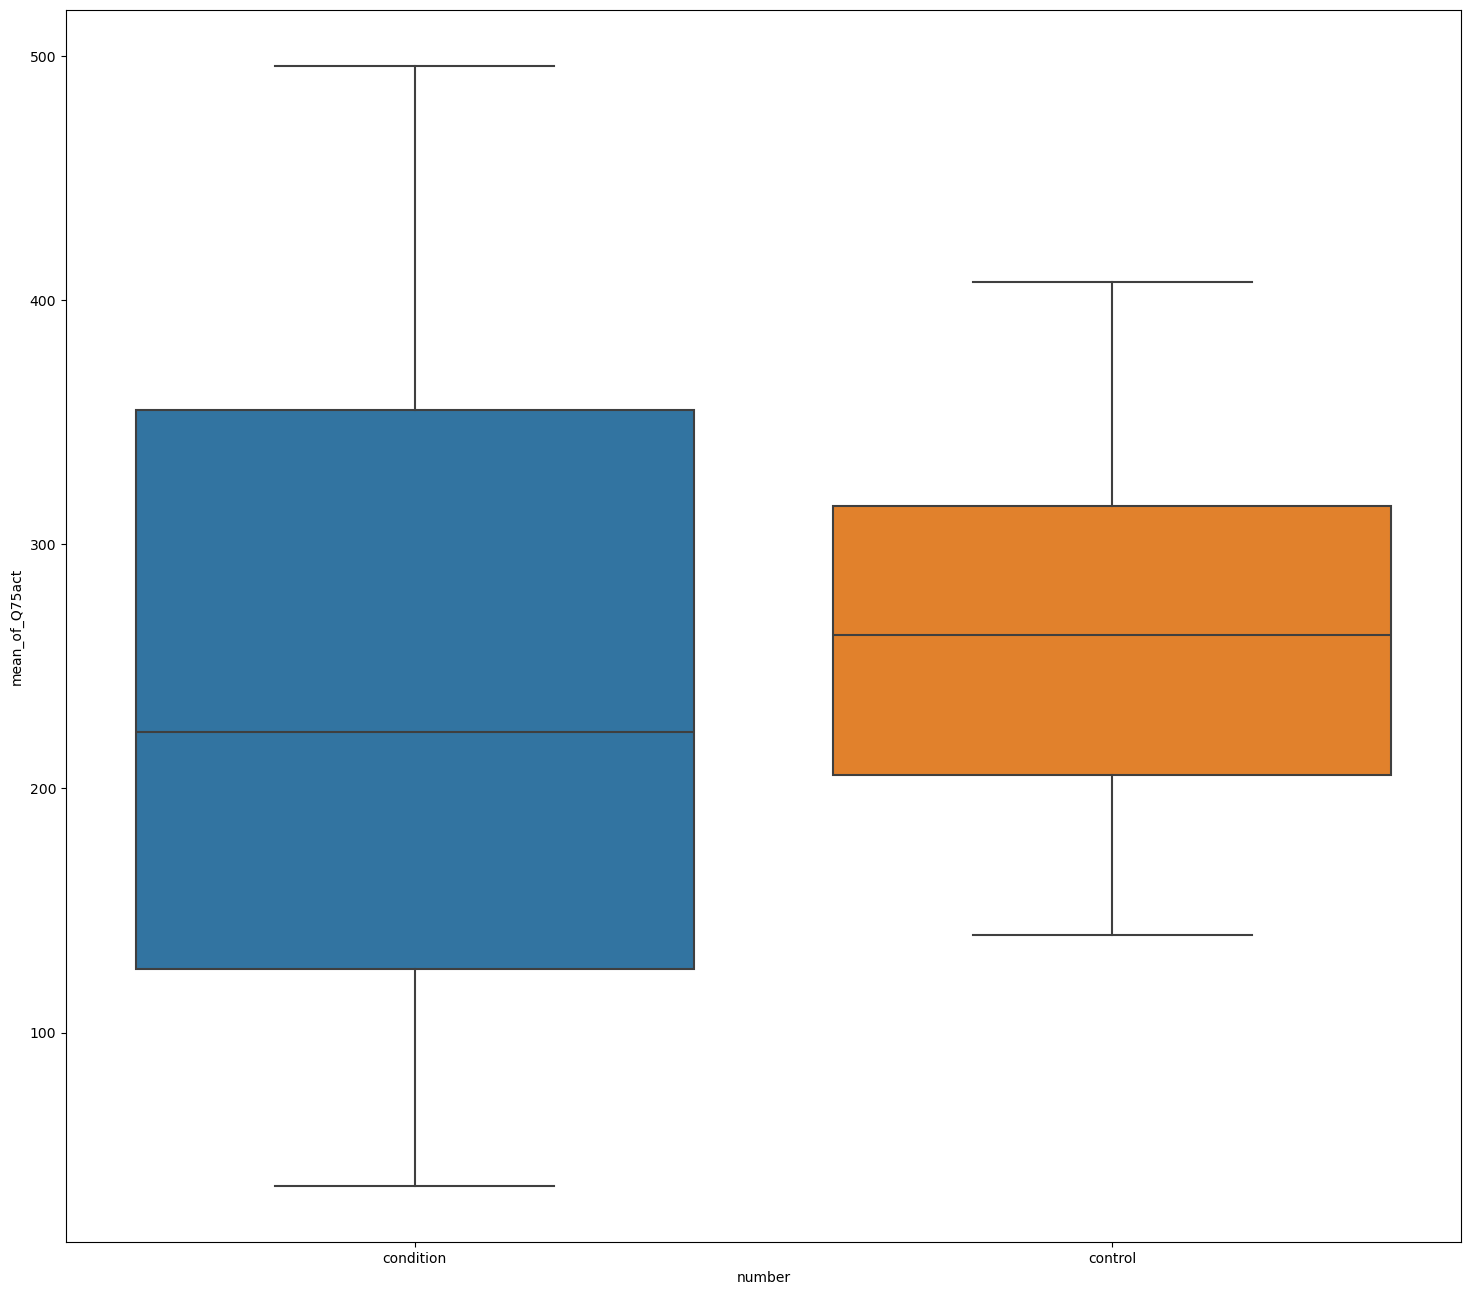

In [34]:
plt.subplots(figsize=(18,16))
sns.boxplot(data=d3, x='number', y='mean_of_Q75act')
plt.show()


In [35]:
import statsmodels. formula.api as smf
model = smf.ols(formula='mean_of_meanact ~ std_of_meanact + mean_of_Q75act', data=d1_control)
results_formula = model.fit()
results_formula.params

Intercept        -1.715166
std_of_meanact   -0.012684
mean_of_Q75act    1.008805
dtype: float64

In [36]:
from statsmodels.stats import diagnostic
ttest = results_formula.t_test([0, 0, 1])
print(ttest)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0088      0.008    120.288      0.000       0.992       1.026


In [37]:
Rsquare = results_formula.rsquared
Rsquare

0.9989370230534083

In [39]:
## preparing data for visualization

x_surf, y_surf = np.meshgrid(np.linspace(d1_control.std_of_meanact.min(), d1_control.std_of_meanact.max(), 100),
                           np.linspace(d1_control.mean_of_Q75act.min(), d1_control.mean_of_Q75act.max(), 100))

onlyX = pd.DataFrame({'std_of_meanact':x_surf.ravel(), 'mean_of_Q75act':y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)


In [40]:

fittedY=np.array(fittedY)
fittedY

array([138.74084361, 138.72883053, 138.71681745, ..., 407.60822965,
       407.59621657, 407.58420348])

In [41]:
# Get the min and max values for each axis
x_min = d1_control['mean_of_meanact'].min()
x_max = d1_control['mean_of_meanact'].max()
y_min = d1_control['std_of_meanact'].min()
y_max = d1_control['std_of_meanact'].max()
z_min = d1_control['mean_of_Q75act'].min()
z_max = d1_control['mean_of_Q75act'].max()


In [42]:
x_surf_min = np.min(x_surf)
x_surf_max = np.max(x_surf)
y_surf_min = np.min(y_surf)
y_surf_max = np.max(y_surf)
fittedY_min = np.min(fittedY)
fittedY_max = np.max(fittedY)

# Print the minimum and maximum values for each array
print("Minimum value of x_surf:", x_surf_min)
print("Maximum value of x_surf:", x_surf_max)
print("Minimum value of y_surf:", y_surf_min)
print("Maximum value of y_surf:", y_surf_max)
print("Minimum value of fittedY:", fittedY_min)
print("Maximum value of fittedY:", fittedY_max)

Minimum value of x_surf: 43.967642
Maximum value of x_surf: 137.730227
Minimum value of y_surf: 139.782917
Maximum value of y_surf: 407.458697
Minimum value of fittedY: 137.55154836578308
Maximum value of fittedY: 408.7734987294476


In [43]:
import plotly.graph_objects as go
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(d3, x='std_of_meanact', y='mean_of_Q75act', z='mean_of_meanact',
                   color= 'number',
                   hover_data=['number'],
                   opacity=0.5)

# Define the surface trace
surface = go.Surface(x=x_surf, y=y_surf, z=fittedY.reshape(x_surf.shape), colorscale='greens', opacity=0.5)



# Add the surface trace to the figure
fig.add_trace(surface)

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='std_of_meanact',
                             yaxis_title='mean_of_Q75act',
                             zaxis_title='mean_of_meanact'))

# Show the plot
fig.show()


In [44]:

model_1= smf.ols(formula='mean_of_meanact ~ std_of_meanact + mean_of_Q75act', data= d1_condition)
model_1_result = model_1.fit()
model_1_result.params

Intercept         45.696502
std_of_meanact     0.162151
mean_of_Q75act     0.508392
dtype: float64

In [45]:
from statsmodels.stats import diagnostic
ttest1 = model_1_result.t_test([0, 0, 1])
print(ttest1)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5084      0.029     17.363      0.000       0.447       0.569


In [46]:
R1square = model_1_result.rsquared
R1square

0.973278688721822

In [47]:

X_surf, Y_surf = np.meshgrid(np.linspace(d1_condition.std_of_meanact.min(), d1_condition.std_of_meanact.max(), 100),
                           np.linspace(d1_condition.mean_of_Q75act.min(), d1_condition.mean_of_Q75act.max(), 100))

onlyXX = pd.DataFrame({'std_of_meanact':X_surf.ravel(), 'mean_of_Q75act':Y_surf.ravel()})
fittedYY = model_1_result.predict(exog=onlyXX)
fittedYY = np.array(fittedYY)

In [48]:
import plotly.graph_objects as go
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(d3, x='std_of_meanact', y='mean_of_Q75act', z='mean_of_meanact',
                   color='number',
                   hover_data=['number'],
                   opacity=0.5)

# Define the surface traces
surface_1 = go.Surface(x=X_surf, y=Y_surf, z=fittedYY.reshape(X_surf.shape), colorscale='Viridis', opacity=0.5)
surface = go.Surface(x=x_surf, y=y_surf, z=fittedY.reshape(x_surf.shape), colorscale='greens', opacity=0.5)


# Add the surface traces to the figure
fig.add_trace(surface_1)
fig.add_trace(surface)
# Set axis labels
fig.update_layout(scene=dict(xaxis_title='std_of_meanact',
                             yaxis_title='mean_of_Q75act',
                             zaxis_title='mean_of_meanact'))

# Show the plot
fig.show()


In [49]:
#F-test
import statsmodels.api as sm
model1 = results_formula
model2 = model_1_result

f_statistic = (model1.ssr - model2.ssr)/(model2.df_resid - model1.df_resid)/(model2.ssr / model2.df_resid)

print("f statistic:", f_statistic)

f statistic: 2.110583524366463


In [ ]:
Categorization

Equation for control case => Mean of activity = -1.715166 -0.012684(std_of_meanact) + 1.008805(mean_of_Q75act)

Equation for condition case => Mean of activity = 45.696502 + 0.162151(std_of_meanact) + 0.508392(mean_of_Q75act)
